This notebook requires one dataframe:
* transposed_df.xlsx


In [ ]:
import pandas as pd
import numpy as np
import missingno as msno

##MISSING VALUES ANALYSIS

In [ ]:
#Load dataframe
df1 = pd.read_excel('transposed_df.xlsx')

In [ ]:
df1.head()

,Unnamed: 0,dossier_id,911,912,913,914,915,916,917,918,...,2561,2562,2563,2564,2565,2566,2567,2568,2569,faculty
0,0,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Geesteswetenschappen
1,1,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Betawetenschappen
2,2,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit der Diergeneeskunde
3,3,1663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2112,D,D,C,D,E,0.4,D,0.6,...,0.142857,0.428571,0.0,0.428571,0.428571,0.428571,0.428571,0.142857,0.142857,Faculteit Geesteswetenschappen


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Columns: 223 entries, Unnamed: 0 to faculty
dtypes: float64(212), int64(2), object(9)
memory usage: 1.3+ MB


In [ ]:
#Drop first column
df1 = df1.drop(df1.columns[:1], axis=1)

#Delete row if faculty name is missing
df1 = df1.dropna(subset=['faculty'])

#Delete categorical questions
columns_to_check = [col for col in df1.columns if col != 'faculty']

for col in columns_to_check:
    if not np.issubdtype(df1[col].dtype, np.number):
        df1 = df1.drop(col, axis=1)

#Convert column names to strings
df1.columns = df1.columns.astype(str)

#Delete row if faculty is University College
df1 = df1[~df1['faculty'].str.contains('University College')]

df1.head()

,dossier_id,916,918,919,920,921,922,923,924,925,...,2561,2562,2563,2564,2565,2566,2567,2568,2569,faculty
0,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Geesteswetenschappen
1,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Betawetenschappen
2,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit der Diergeneeskunde
4,2112,0.4,0.6,0.6,0.4,0.2,0.6,0.6,0.4,0.6,...,0.142857,0.428571,0.0,0.428571,0.428571,0.428571,0.428571,0.142857,0.142857,Faculteit Geesteswetenschappen
5,30499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Sociale Wetenschappen


In [ ]:
df1

,dossier_id,916,918,919,920,921,922,923,924,925,...,2561,2562,2563,2564,2565,2566,2567,2568,2569,faculty
0,1152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Geesteswetenschappen
1,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Betawetenschappen
2,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit der Diergeneeskunde
4,2112,0.4,0.6,0.6,0.4,0.2,0.6,0.6,0.4,0.6,...,0.142857,0.428571,0.000000,0.428571,0.428571,0.428571,0.428571,0.142857,0.142857,Faculteit Geesteswetenschappen
5,30499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Faculteit Sociale Wetenschappen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,91894,0.4,0.4,0.6,0.4,0.2,0.2,0.2,0.8,0.8,...,0.142857,0.428571,0.428571,0.571429,0.428571,0.571429,0.285714,0.428571,0.714286,Faculteit Sociale Wetenschappen
746,91908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.142857,0.428571,0.428571,0.285714,0.285714,0.285714,0.142857,0.285714,0.428571,Faculteit Geesteswetenschappen
747,91927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.142857,0.142857,0.285714,0.142857,0.142857,0.285714,0.142857,0.285714,Faculteit Geowetenschappen
748,91928,0.6,0.4,0.6,0.6,0.4,0.6,0.6,0.4,0.6,...,0.714286,0.714286,0.571429,0.428571,0.571429,0.428571,0.428571,0.428571,0.571429,"Faculteit Recht, Economie, Bestuur en Organisatie"


In [ ]:
#Show percentage of people that have filled in the test

#Load dataframe with testtypes
testtype_df = pd.read_excel('furthered_modified_data_set_demo_accounts_removed (3).xlsx')

In [ ]:
testtype_df.head()

,question_id,dossier_id,answer,answeredTest_id,question,type,label,datetime,maingroup,maingroup_id,level1subgroup1,faculty
0,2281,1152,0.6,19833,question.id_2281,likert/likert5puntsacceptatie2positiefpluseen,rapporten schrijven,2022-06-27 12:36:27,Beroepskeuzetest,459.0,Conventioneel,Faculteit Geesteswetenschappen
1,2263,1152,0.6,19833,question.id_2263,likert/likert5puntsacceptatie2positiefpluseen,intuïtief zijn,2022-06-27 12:36:27,Beroepskeuzetest,459.0,Artistiek,Faculteit Geesteswetenschappen
2,2269,1152,0.6,19833,question.id_2269,likert/likert5puntsacceptatie2positiefpluseen,je gevoelens duidelijk uiten,2022-06-27 12:36:27,Beroepskeuzetest,459.0,Sociaal,Faculteit Geesteswetenschappen
3,2278,1152,0.6,19833,question.id_2278,likert/likert5puntsacceptatie2positiefpluseen,activiteiten en evenementen organiseren,2022-06-27 12:36:27,Beroepskeuzetest,459.0,Ondernemend,Faculteit Geesteswetenschappen
4,2280,1152,0.6,19833,question.id_2280,likert/likert5puntsacceptatie2positiefpluseen,onderdeel zijn van een organisatie,2022-06-27 12:36:27,Beroepskeuzetest,459.0,Conventioneel,Faculteit Geesteswetenschappen


In [ ]:
#Merge df1 with the testtype for each question


#Iterate over testtype_df rows
for _, row in testtype_df.iterrows():
    question_id = row['question_id']
    maingroup = row['maingroup']

    #Check the value of maingroup and modify column names accordingly
    if maingroup == 'Beroepskeuzetest':
        prefix = 'pers-'
    elif maingroup == 'Competenties':
        prefix = 'comp-'
    elif maingroup == 'tests.workstyles.title':
        prefix = 'ws-'
    elif maingroup == 'tests.workvalues.title':
        prefix = 'wv-'
    else:
        continue

    #Modify column name in df1
    column_name = str(question_id)
    new_column_name = prefix + column_name
    df1.rename(columns={column_name: new_column_name}, inplace=True)



In [ ]:
column_names = df1.columns.tolist()
print(column_names)

['dossier_id', '916', '918', '919', '920', '921', '922', '923', '924', '925', '927', '928', '929', '930', '931', '933', '934', '935', '936', '937', '938', '939', '940', '948', '949', '951', '952', '954', '955', '957', '958', '972', '973', '974', 'pers-2214', 'pers-2215', 'pers-2216', 'pers-2217', 'pers-2218', 'pers-2219', 'pers-2220', 'pers-2221', 'pers-2222', 'pers-2223', 'pers-2224', 'pers-2225', 'pers-2226', 'pers-2227', 'pers-2228', 'pers-2229', 'pers-2230', 'pers-2231', 'pers-2232', 'pers-2233', 'pers-2234', 'pers-2235', 'pers-2236', 'pers-2237', 'pers-2238', 'pers-2239', 'pers-2240', 'pers-2241', 'pers-2242', 'pers-2243', 'pers-2244', 'pers-2245', 'pers-2246', 'pers-2247', 'pers-2248', 'pers-2249', 'pers-2250', 'pers-2251', 'pers-2252', 'pers-2253', 'pers-2254', 'pers-2255', 'pers-2256', 'pers-2257', 'pers-2258', 'pers-2259', 'pers-2260', 'pers-2261', 'pers-2262', 'pers-2263', 'pers-2264', 'pers-2265', 'pers-2266', 'pers-2267', 'pers-2268', 'pers-2269', 'pers-2270', 'pers-2271', 

In [ ]:
#Get the column names that start with 'pers-', 'comp-', 'ws-', and 'wv-'
pers_columns = [column for column in df1.columns if column.startswith('pers-') and column[-1].isdigit()]
comp_columns = [column for column in df1.columns if column.startswith('comp-') and column[-1].isdigit()]
ws_columns = [column for column in df1.columns if column.startswith('ws-') and column[-1].isdigit()]
wv_columns = [column for column in df1.columns if column.startswith('wv-') and column[-1].isdigit()]

#Iterate over the rows and count the number of rows with at least one non-missing value
count_pers = count_comp = count_ws = count_wv = 0
for _, row in df1.iterrows():
    if any(pd.notna(row[column]) for column in pers_columns):
        count_pers += 1
    if any(pd.notna(row[column]) for column in comp_columns):
        count_comp += 1
    if any(pd.notna(row[column]) for column in ws_columns):
        count_ws += 1
    if any(pd.notna(row[column]) for column in wv_columns):
        count_wv += 1

#Calculate the percentages
percentage_pers = (count_pers / len(df1)) * 100
percentage_comp = (count_comp / len(df1)) * 100
percentage_ws = (count_ws / len(df1)) * 100
percentage_wv = (count_wv / len(df1)) * 100

print(f"Percentage of rows with at least one non-missing value in pers columns: {percentage_pers}%")
print(f"Percentage of rows with at least one non-missing value in comp columns: {percentage_comp}%")
print(f"Percentage of rows with at least one non-missing value in ws columns: {percentage_ws}%")
print(f"Percentage of rows with at least one non-missing value in wv columns: {percentage_wv}%")

Percentage of rows with at least one non-missing value in pers columns: 99.85141158989599%
Percentage of rows with at least one non-missing value in comp columns: 57.94947994056464%
Percentage of rows with at least one non-missing value in ws columns: 53.04606240713225%
Percentage of rows with at least one non-missing value in wv columns: 60.0297176820208%


In [ ]:
#Filter out columns that start with 'pers-'
subset_pers = df1.filter(regex=r'^pers-\d+|dossier_id', axis=1)

print(subset_pers)

     dossier_id  pers-2214  pers-2215  pers-2216  pers-2217  pers-2218  \
0          1152        0.4        0.0        0.6        0.4        0.8   
1          1532        0.6        0.8        0.6        0.2        0.8   
2          1649        0.6        0.0        0.4        0.4        0.6   
4          2112        0.6        0.4        0.2        0.4        0.6   
5         30499        0.4        0.4        0.2        0.2        0.4   
..          ...        ...        ...        ...        ...        ...   
745       91894        0.4        0.4        0.4        0.4        0.2   
746       91908        0.6        0.6        0.8        0.2        0.6   
747       91927        0.6        0.4        0.6        0.0        0.6   
748       91928        0.6        0.4        0.6        0.8        0.6   
749       91930        0.2        0.0        0.8        0.4        0.6   

     pers-2219  pers-2220  pers-2221  pers-2222  ...  pers-2313  pers-2314  \
0          0.4        0.8        

In [ ]:
#Get the indices of the rows with the most NANs

#Drop rows where all columns except the first column contain NaN values
subset_pers.dropna(subset=subset_pers.columns[1:], how='all', inplace=True)

#Count the number of NaNs in each row
nan_counts = subset_pers.isna().sum(axis=1)

#Get the indices of the five rows with the highest NaN counts
top_rows_indices = nan_counts.nlargest(5).index

#Get the dossier IDs and corresponding NaN counts
top_dossier_ids = df1.loc[top_rows_indices, 'dossier_id']
top_nan_counts = nan_counts.loc[top_rows_indices]

#Print the dossier IDs and corresponding NaN counts
for dossier_id, nan_count in zip(top_dossier_ids, top_nan_counts):
    print(f"Dossier ID: {dossier_id}\tNaN Count: {nan_count}")

Dossier ID: 79963	NaN Count: 72
Dossier ID: 80245	NaN Count: 72
Dossier ID: 81037	NaN Count: 72
Dossier ID: 81198	NaN Count: 72
Dossier ID: 87002	NaN Count: 3


<ipython-input-112-8e0059a57ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_pers.dropna(subset=subset_pers.columns[1:], how='all', inplace=True)


<Axes: >

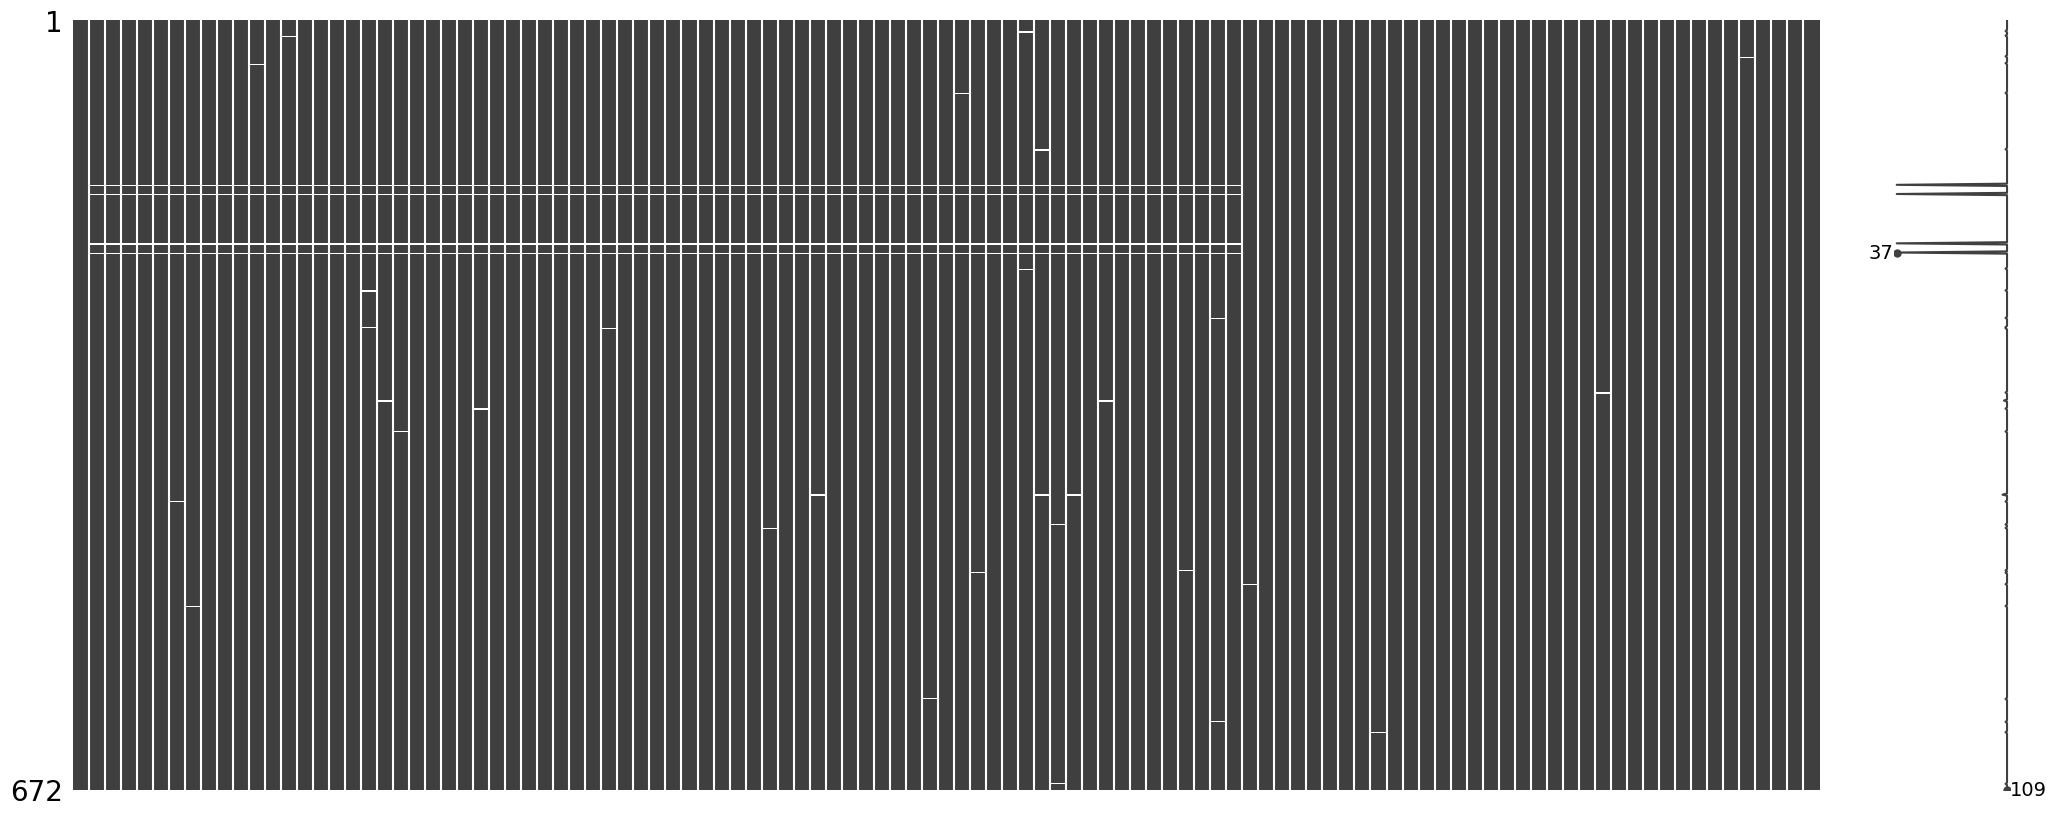

In [ ]:
#Visualize missing values of competences dataset
msno.matrix(subset_pers)

In [ ]:
# Filter out columns that start with 'comp-'
subset_comp = df1.filter(regex=r'^comp-\d+|dossier_id', axis=1)

In [ ]:
print(subset_comp)

     dossier_id  comp-2535  comp-2536  comp-2537  comp-2538  comp-2539  \
0          1152        NaN        NaN        NaN        NaN        NaN   
1          1532        NaN        NaN        NaN        NaN        NaN   
2          1649        NaN        NaN        NaN        NaN        NaN   
4          2112   0.571429   0.714286   0.571429   0.428571   0.142857   
5         30499        NaN        NaN        NaN        NaN        NaN   
..          ...        ...        ...        ...        ...        ...   
745       91894   0.571429   0.428571   0.571429   0.428571   0.571429   
746       91908   0.571429   0.428571   0.571429   0.428571   0.571429   
747       91927   0.428571   0.428571   0.428571   0.428571   0.285714   
748       91928   0.714286   0.714286   0.571429   0.571429   0.571429   
749       91930   0.571429   0.285714   0.571429   0.428571   0.142857   

     comp-2540  comp-2541  comp-2542  comp-2543  ...  comp-2560  comp-2561  \
0          NaN        NaN        

In [ ]:
#Get the indices of the rows with the most NANs

#Drop rows where all columns except the first column contain NaN values
subset_comp.dropna(subset=subset_comp.columns[1:], how='all', inplace=True)

#Count the number of NaNs in each row
nan_counts = subset_comp.isna().sum(axis=1)

#Get the indices of the five rows with the highest NaN counts
top_rows_indices = nan_counts.nlargest(5).index

#Get the dossier IDs and corresponding NaN counts
top_dossier_ids = df1.loc[top_rows_indices, 'dossier_id']
top_nan_counts = nan_counts.loc[top_rows_indices]

#Print the dossier IDs and corresponding NaN counts
for dossier_id, nan_count in zip(top_dossier_ids, top_nan_counts):
    print(f"Dossier ID: {dossier_id}\tNaN Count: {nan_count}")

Dossier ID: 81740	NaN Count: 17
Dossier ID: 79518	NaN Count: 1
Dossier ID: 80247	NaN Count: 1
Dossier ID: 81324	NaN Count: 1
Dossier ID: 81544	NaN Count: 1


<ipython-input-114-a774dc28085d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_comp.dropna(subset=subset_comp.columns[1:], how='all', inplace=True)


<Axes: >

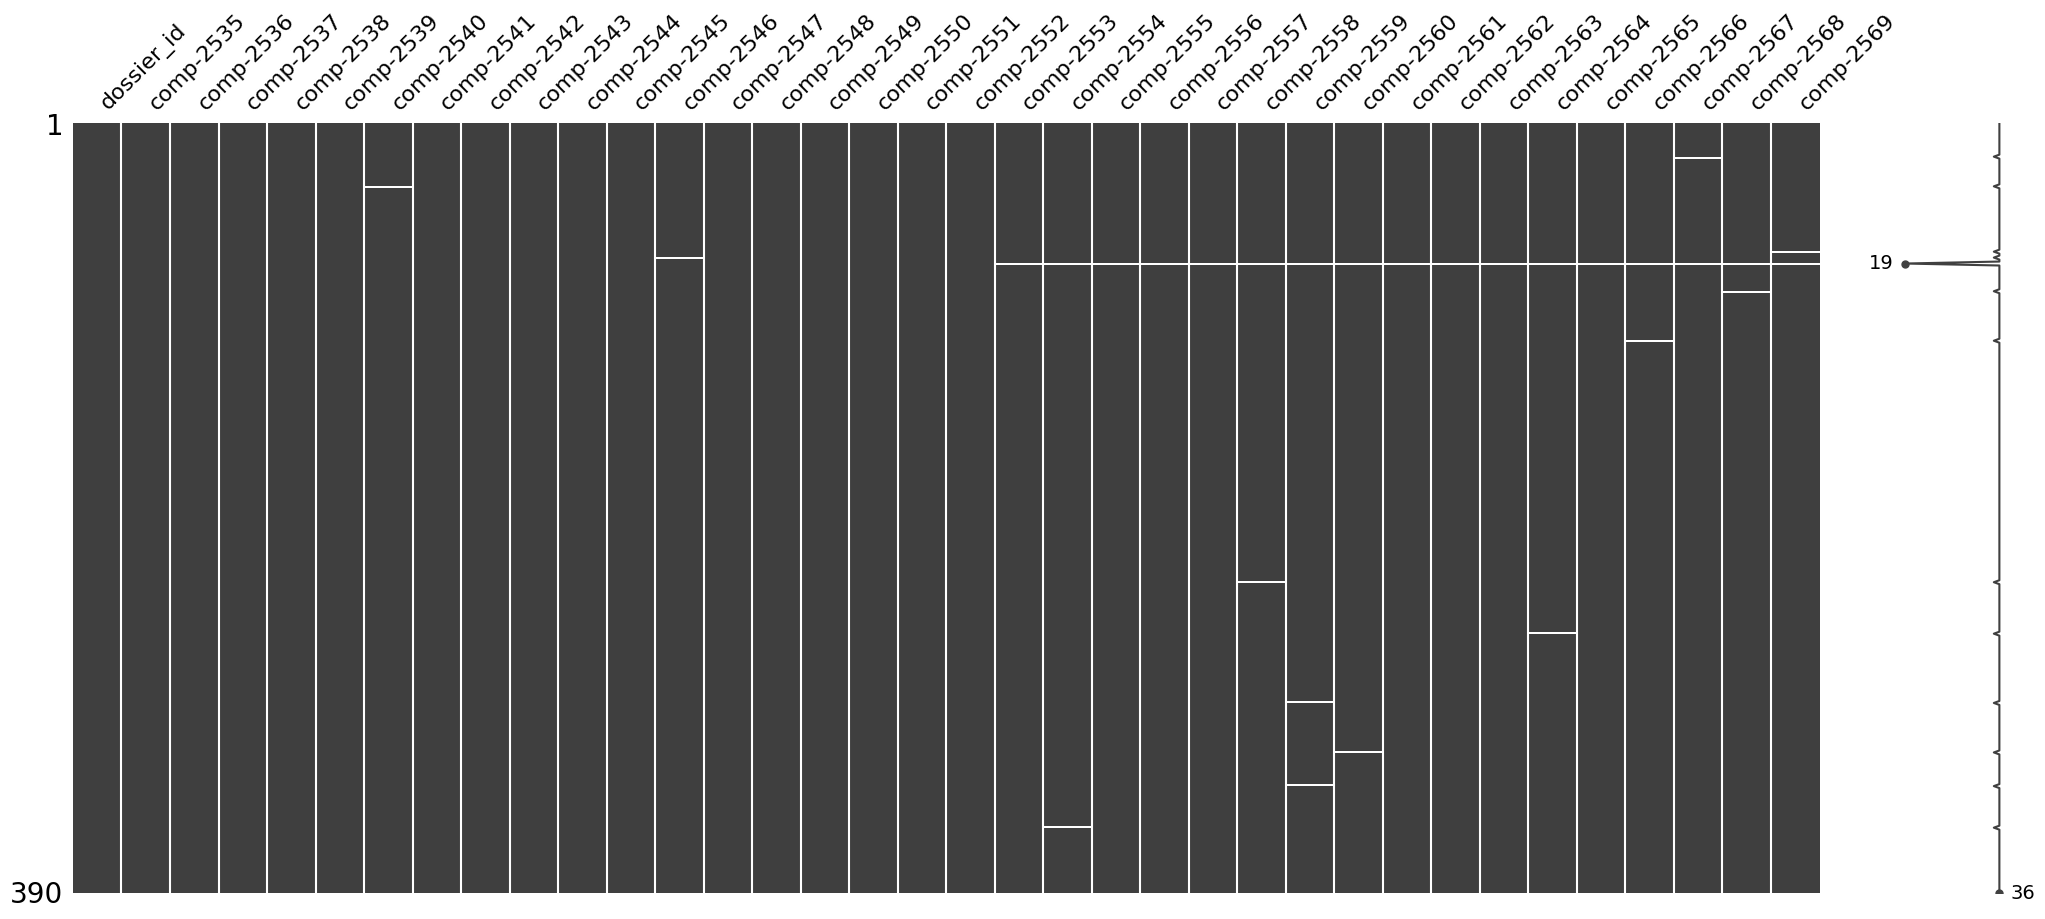

In [ ]:
#Visualize missing values of competences dataset
msno.matrix(subset_comp)

In [ ]:
#Filter out columns that start with 'ws-'
subset_ws = df1.filter(regex=r'^ws-\d+', axis=1)
print(subset_ws)

In [ ]:
subset_ws.dropna(how='all', inplace=True)

#Visualize missing values of workstyles dataset
msno.matrix(subset_ws)

In [ ]:
#Filter out columns that start with 'wv-'
subset_wv = df1.filter(regex=r'^wv-\d+', axis=1)
print(subset_wv)

In [ ]:
subset_wv.dropna(how='all', inplace=True)

#Visualize missing values of work values dataset
msno.matrix(subset_wv)